<a href="https://colab.research.google.com/github/SmrutiNIT/project/blob/main/2Copy_of_DS_2project_24_april_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disease Condition prediction based on drug reviews**

In [14]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [23]:
drug=pd.read_csv('/content/drugsCom_raw (1).tsv',  sep='\t', encoding='latin-1')

In [22]:
drug.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012         27.0  
1     April 27, 2010        192.0  
2  December 14, 2009         17.0  
3   November 3, 2015         10.0  
4  November 27, 2016         37.0

In [24]:
drug.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [25]:
drug.describe()

Unnamed: 0         rating    usefulCount
count  104451.000000  104450.000000  104450.000000
mean   116057.358733       6.989277      27.998506
std     66995.284262       3.276475      36.638584
min         2.000000       1.000000       0.000000
25%     58466.000000       5.000000       6.000000
50%    116001.000000       8.000000      16.000000
75%    173866.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [26]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104451 entries, 0 to 104450
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   104451 non-null  int64  
 1   drugName     104451 non-null  object 
 2   condition    103853 non-null  object 
 3   review       104450 non-null  object 
 4   rating       104450 non-null  float64
 5   date         104450 non-null  object 
 6   usefulCount  104450 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [27]:
drug.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount    float64
dtype: object

In [28]:
drug['condition'].nunique()

811

In [30]:
condition1 = ['Depression','High Blood Pressure','Diabetes, Type 2']
drug1=drug[drug['condition'].isin(condition1)]
drug1

Unnamed: 0                                       drugName  \
11           75612                                 L-methylfolate   
31           96233                                     Sertraline   
44          121333                                    Venlafaxine   
50          156544                                    Dulaglutide   
67          131909                                     Effexor XR   
81          171349                                     Wellbutrin   
96          102810                                   Aripiprazole   
104         208641                        Amlodipine / olmesartan   
143         186257                                 Desvenlafaxine   
146         156730                                    Dulaglutide   
150          45238                                     Fluoxetine   
153         225257                                      Bupropion   
169          94168                                     Trintellix   
182          82188                                    Liraglutide   
184         224842                                      Bupropion   
185          32516                                     Lisinopril   
187          32822                                  Empagliflozin   
205         197894                                     Metoprolol   
222          45291                                     Fluoxetine   
223         178948                                        Victoza   
228         232066                                      Trazodone   
230         205953                                        Pristiq   
242         195947                                Levomilnacipran   
251          82584                                    Liraglutide   
256          81720                                    Liraglutide   
258         186185                                 Desvenlafaxine   
261         183200                                       Cymbalta   
271         198429                                      Exenatide   
281          13891                                       Bydureon   
288         178683                                        Victoza   
298         178737                                        Victoza   
314         142104                                   Escitalopram   
326         122246                                    Venlafaxine   
330         176778                                         Nardil   
336         201175                                         Zoloft   
362         231485                                      Trazodone   
363         136286                                       Prazosin   
372         156581                                    Dulaglutide   
403         158491                                Methylphenidate   
405         141645                                   Escitalopram   
420         225955                                      Bupropion   
434         198434                                      Exenatide   
446          32140                                  Wellbutrin XL   
447         198026                                     Metoprolol   
450          28999                                        Lexapro   
478         205363                                        Pristiq   
494         201719                                         Zoloft   
504          95811                                     Sertraline   
521         198302                                      Exenatide   
566         121905                                    Venlafaxine   
572         126104                                        Viibryd   
593          55635                                        Effexor   
606          78165                                        Zyprexa   
610         121103                                    Venlafaxine   
631          11891                                      Trulicity   
635         201891                                    Sitagliptin   
641         122110                                    Venlafaxine   
642   

In [31]:
drug1['condition'].unique()

array(['Depression', 'Diabetes, Type 2', 'High Blood Pressure'],
      dtype=object)

In [32]:
# Converting the date in to date time format
#drug1['date'] = pd.to_datetime(drug1['date'])

In [33]:
drug1.loc[drug1['rating'] == 1, :]['drugName'].value_counts().head(10)

Venlafaxine     53
Lisinopril      43
Vortioxetine    42
Bupropion       38
Duloxetine      33
Cymbalta        32
Pristiq         31
Dulaglutide     31
Effexor         31
Trulicity       30
Name: drugName, dtype: int64

In [47]:
#check number of unique values in drugName
print(drug1['drugName'].nunique())

#check number of unique values in condition
print(drug1['condition'].nunique())

312
3


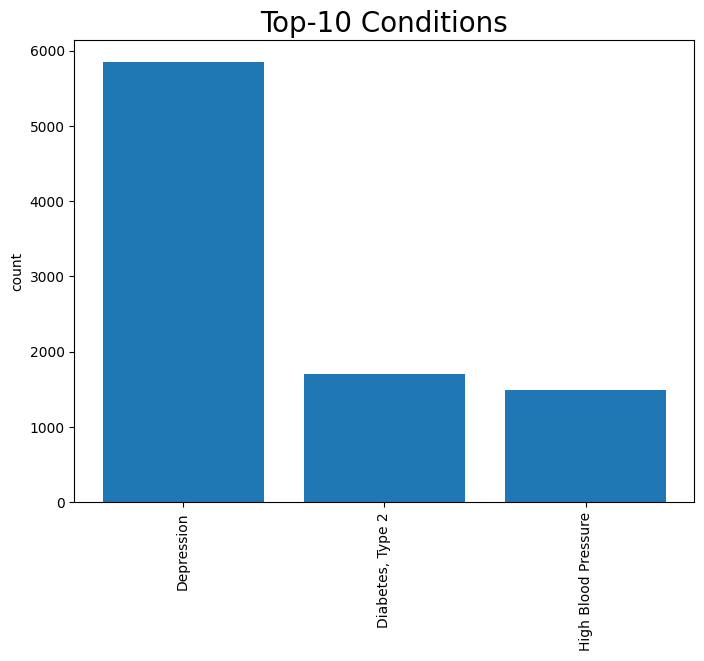

In [35]:
#plot a bargraph to check top 10 conditions
plt.figure(figsize=(8,6))
conditions = drug1['condition'].value_counts(ascending = False).head(10)

plt.bar(conditions.index,conditions.values)
plt.title('Top-10 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

From above graph we can see that  :

Depression is nearly three times  as big as anyone, around 5000.

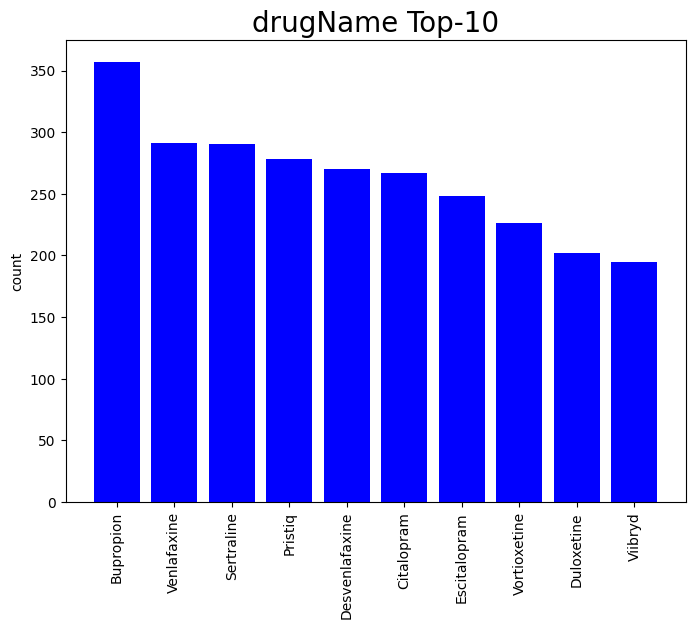

In [36]:
#plot a bargraph to check top 10 drugName
plt.figure(figsize=(8,6))
drugName_top = drug1['drugName'].value_counts(ascending = False).head(10)

plt.bar(drugName_top.index,drugName_top.values,color='blue')
plt.title('drugName Top-10',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [37]:
# The top drugName is Brupopion.
 

In [38]:
ratings_ = drug1['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/drug.shape[0])
print(ratings_)

   rating  counts   percent
0    10.0    2442  2.337938
1     9.0    1568  1.501182
2     1.0    1201  1.149821
3     8.0    1125  1.077060
4     7.0     661  0.632833
5     5.0     484  0.463375
6     2.0     437  0.418378
7     6.0     424  0.405932
8     3.0     393  0.376253
9     4.0     311  0.297747


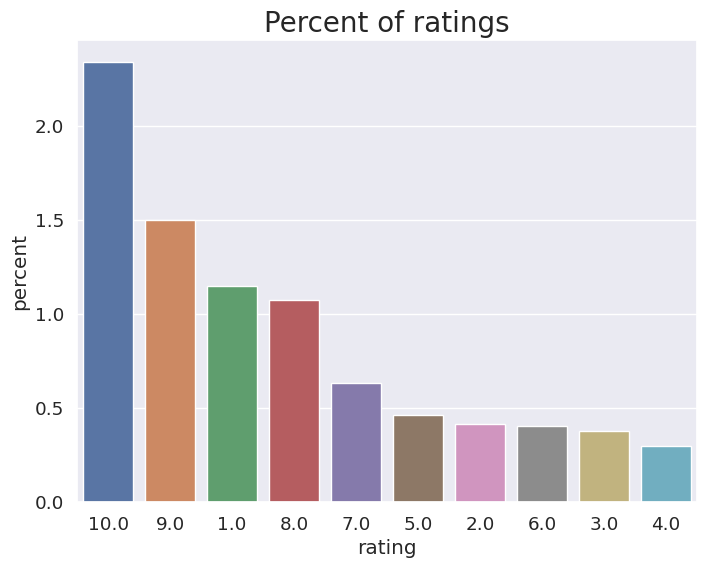

In [39]:
# Setting the Parameter
sns.set(font_scale = 1.2)
plt.rcParams['figure.figsize'] = [8, 6]

#let's plot and check
sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Percent of ratings',fontsize=20)
plt.show()

We notice that most of the ratings are high with ratings 10 and 9.

Rating 1 is also high which shows the extreme ratings of the user which shows that there is some side effects.

About 80% of the values have rating greater than 5.

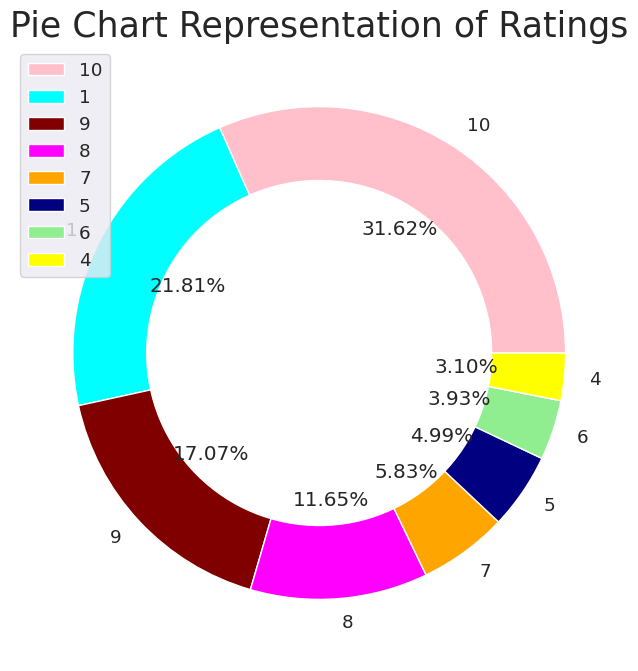

In [74]:
# making a pie chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

From the pie chart, We notice that most of the ratings are high with ratings 10 and 9.

Rating 1 is also high which shows the extreme ratings of the user. Those medicine might have some side effects.

<ipython-input-68-256667934bbc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(drug1['usefulCount'])


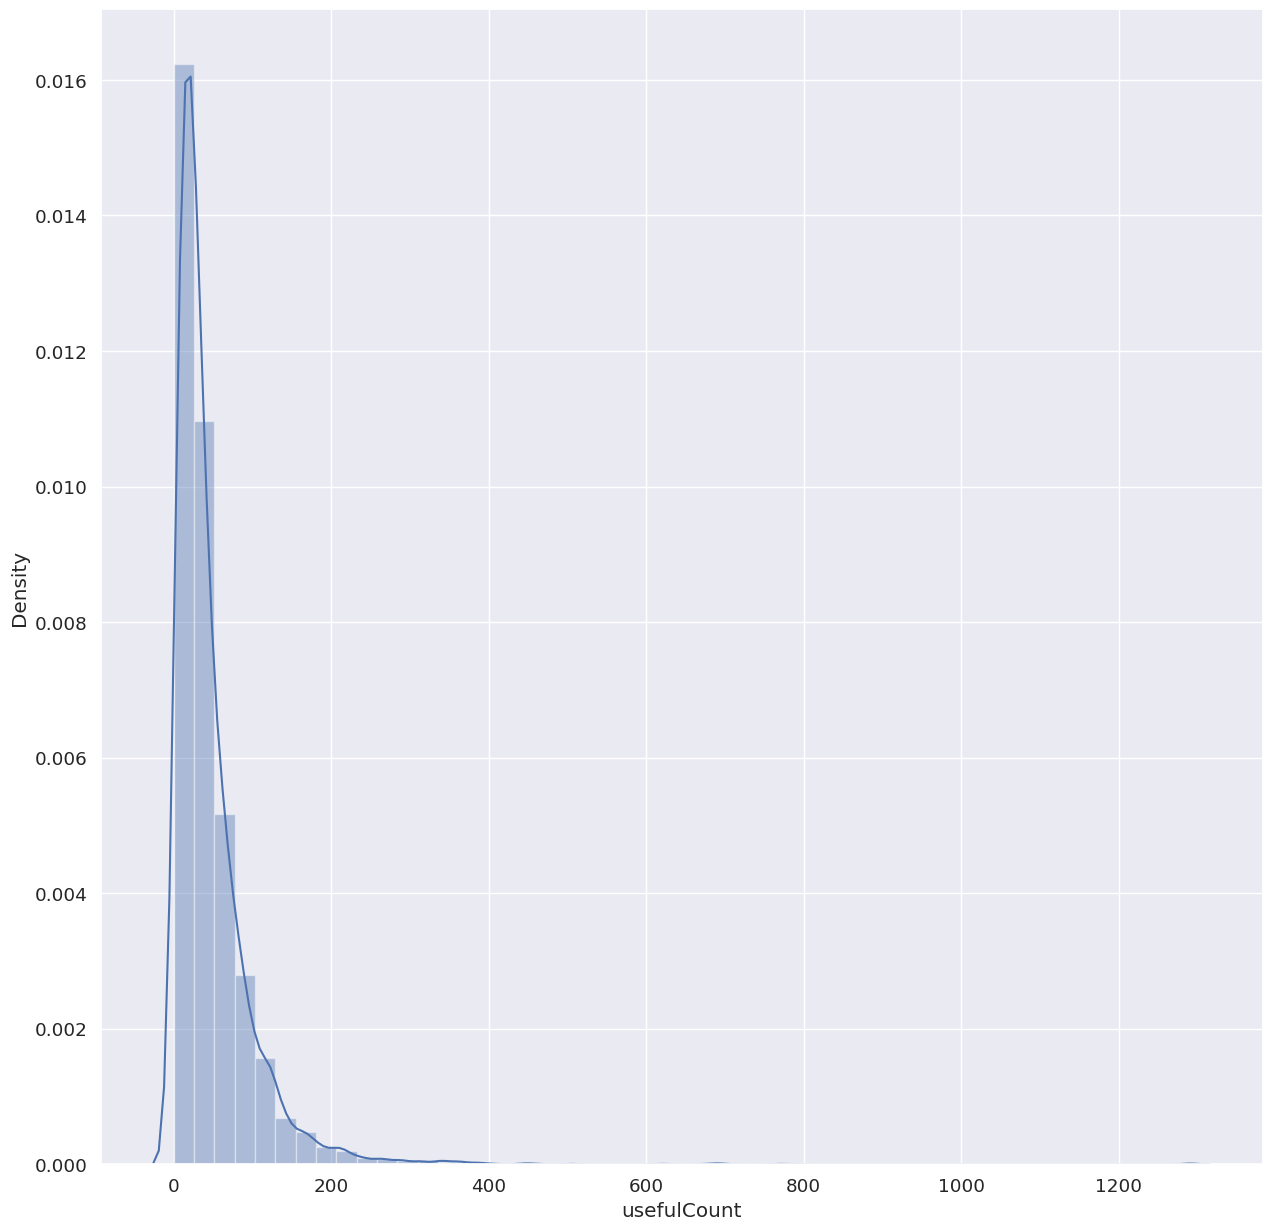

In [68]:
#Plot a distplot of usefulCount
sns.distplot(drug1['usefulCount'])
plt.show()

usefulCount is positive-skewed.

Most of the usefulCounts are distributed between 0 and 190.

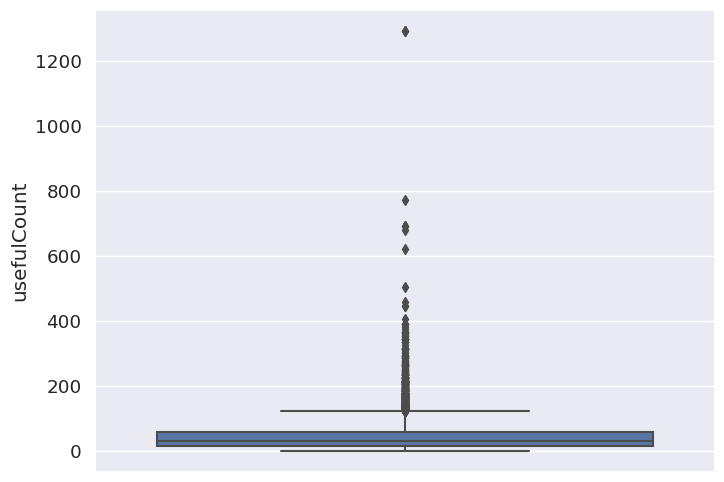

In [48]:
#check the descriptive summary
sns.boxplot(y = drug1['usefulCount'])
plt.show()

 There are huge outliers present in our dataset.
 
 Some drugs have extreme useful counts.

In [69]:
drug_train = drug[(drug['condition']=='Depression') | (drug['condition']=='High Blood Pressure')|(drug['condition']=='Diabetes, Type 2')]
drug.shape

(104451, 7)

In [70]:
drug_train.shape

(9046, 7)

In [71]:
X = drug_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

In [72]:
X.condition.value_counts()

Depression             5847
Diabetes, Type 2       1708
High Blood Pressure    1491
Name: condition, dtype: int64

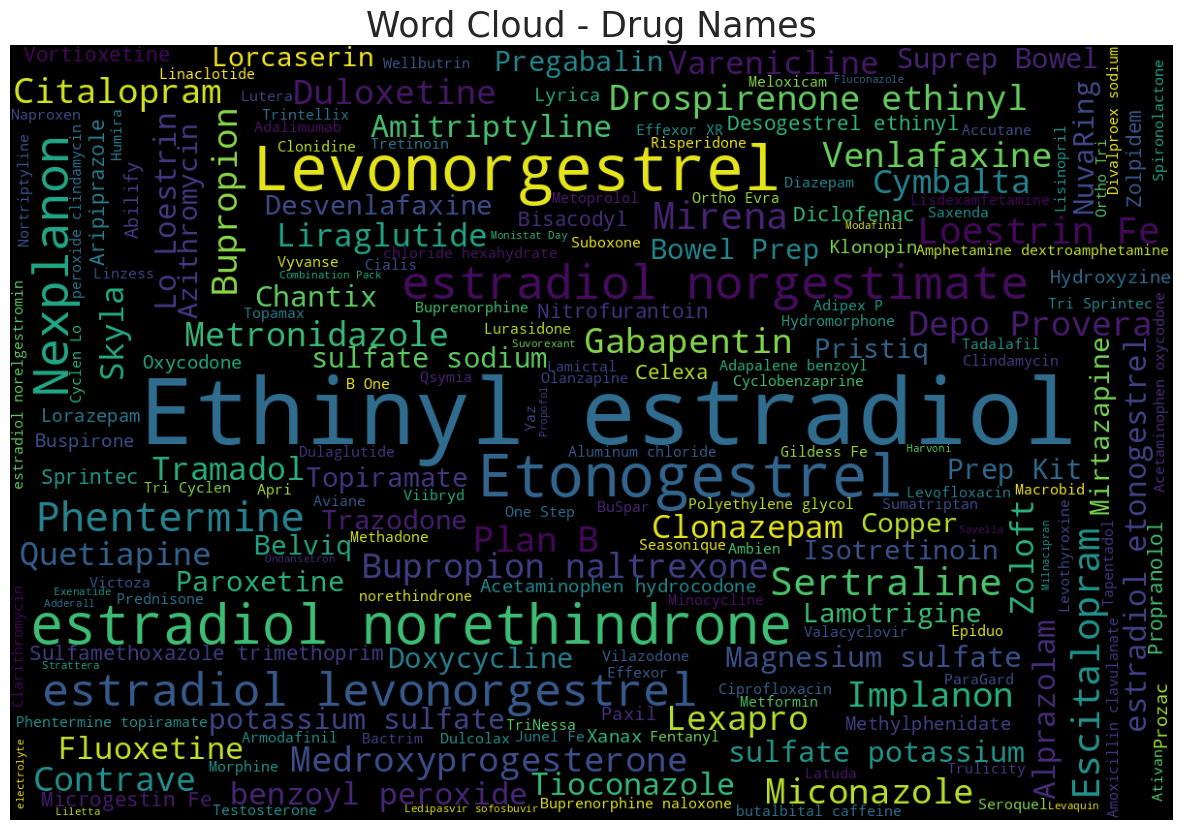

In [67]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, width = 1200, height = 800).generate(str(drug['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

**EDA**